# Main task

In [135]:
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Import data

In [136]:
train = pd.read_csv('../data/train.csv', index_col='PassengerId')
test = pd.read_csv('../data/test.csv', index_col='PassengerId')

In [137]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Visualise data

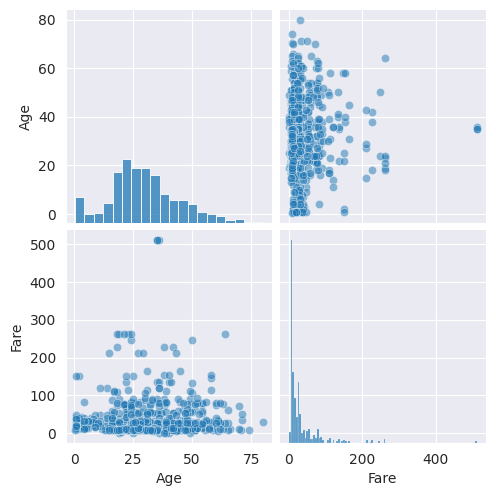

In [138]:
# train[['Age', 'Fare']]
# or
sns.pairplot(train[['Age', 'Fare']], plot_kws={'alpha':0.5})

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

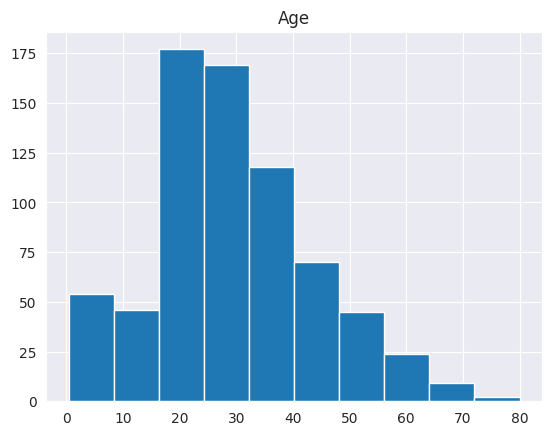

In [139]:
train.hist('Age')

## Processing data

In [140]:
# train_filter = train['Sex'].isin(['female'])
# train_female = train[train_filter]
# train_female_above_35 = train_female[train_female['Age'] > 35]
# train_female_above_35 = train_female_above_35..sort_values('Age')
# or
train_female_above_35 = train[(train['Sex'] == 'female') & (train['Age'] > 35)].sort_values('Age')

train_female_above_35

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
...,...,...,...,...,...,...,...,...,...,...,...
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


# Build model

## Visualise data

In [141]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


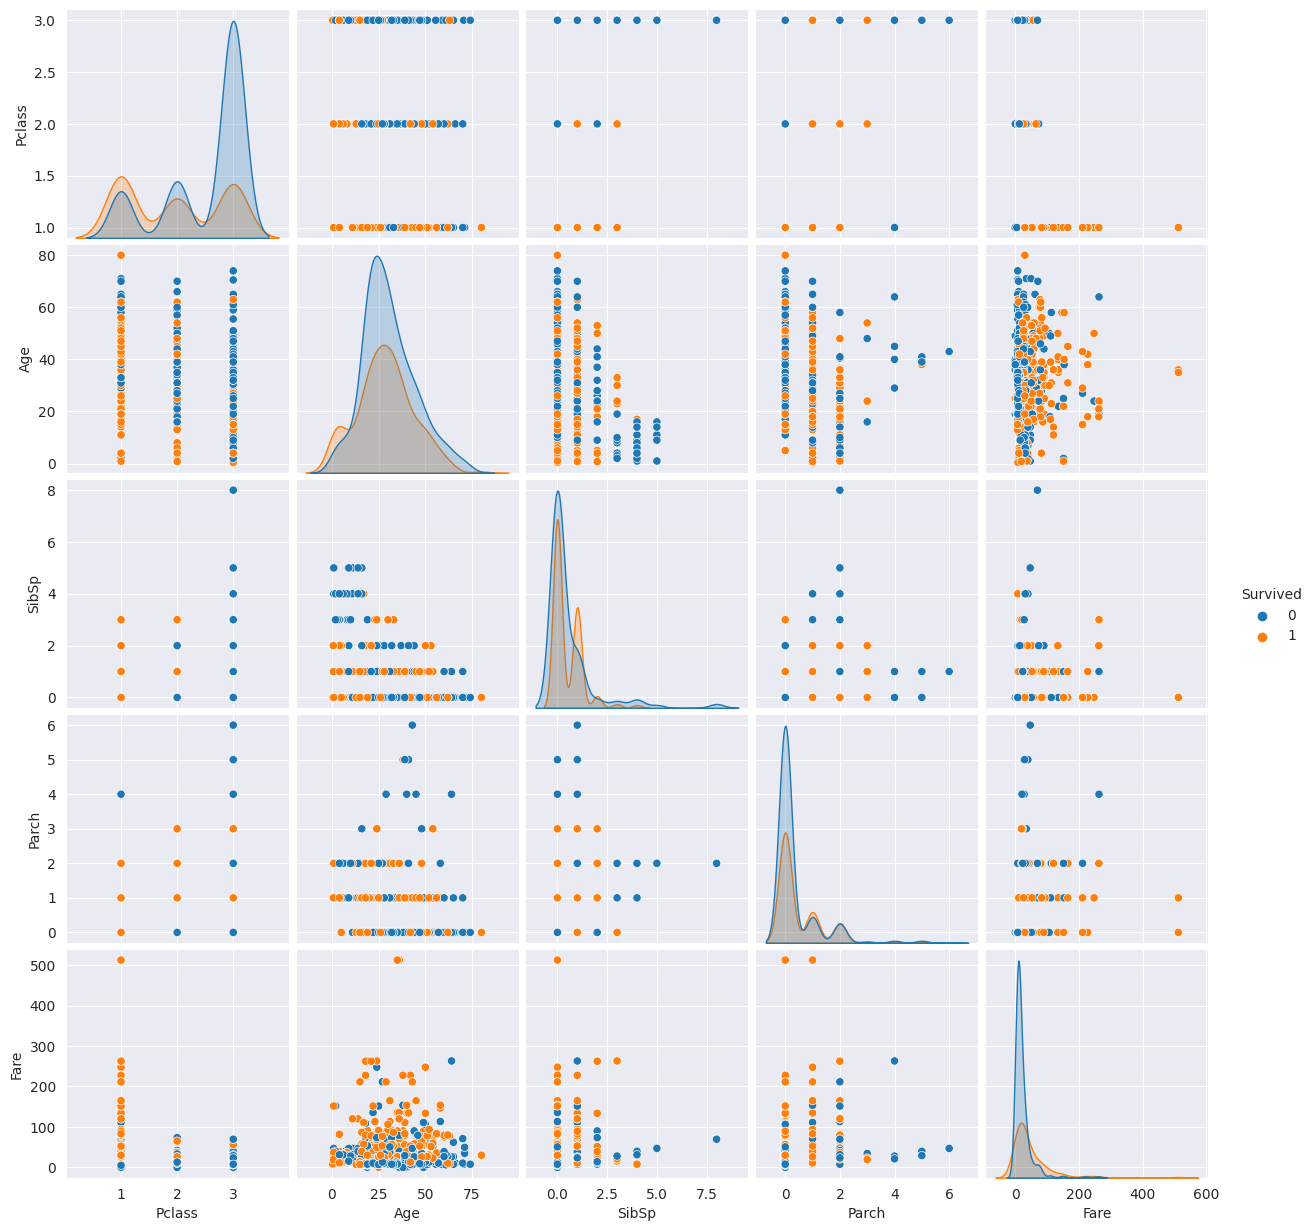

In [142]:
sns.pairplot(train, hue='Survived')

## Processing data

In [143]:
# X = train.drop(['Survived', 'Name', 'Ticket'], axis=1)
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1) # temporary
# converge sex to boolean
dict_sex = {"female" : 0, "male" : 1}
X.Sex = X.Sex.map(dict_sex)
# converge embarked to boolean
dict_emb = {"S" : 0, "Q" : 1, "C" : 2}
X.Embarked = X.Embarked.map(dict_emb)
# fill gap from NaN
X.Age = X.Age.fillna(X.Age.mean().round(0)).astype(int)
X.Embarked = X.Embarked.fillna(3).astype(int)

y = train['Survived']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40);

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
364,3,1,35,0,0,7.0500,0
114,3,0,20,1,0,9.8250,0
496,3,1,30,0,0,14.4583,2
233,2,1,59,0,0,13.5000,0
424,3,0,28,1,1,14.4000,0
...,...,...,...,...,...,...,...
441,2,0,45,1,1,26.2500,0
166,3,1,9,0,2,20.5250,0
8,3,1,2,3,1,21.0750,0


## Model creation

In [189]:
model = KNeighborsClassifier(n_neighbors=18)

## Model train


In [190]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [191]:
print(f'Score: {model.score(X_test, y_test)}')

Score: 0.7220338983050848
